# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [24]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
%matplotlib inline

### Reading the Mosaic Image

In [25]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_NAME)# YOUR CODE HERE

In [26]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_DIR+IMG_NAME,1)
    b,g,r = cv2.split(img) 
    img = cv2.merge([r,g,b]) 
    return img

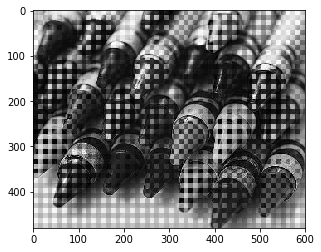

In [27]:
# For a sanity check, display your image here

plt.imshow(mosaic_img) 



In [16]:
### Linear Interpolation

In [17]:
### HINT : You might want to use filters

In [18]:
### HINT : To use filters you might want to write your kernels

In [19]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [28]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image




def rmask(mosaic_img):
    mosaic_shape = np.shape(mosaic_img)
    raw_image = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    raw_image[0::2,0::2]=mosaic_img[0::2,0::2,0]
    return raw_image


def bmask(mosaic_img):
    mosaic_shape = np.shape(mosaic_img)
    raw_image = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    raw_image[1::2,1::2]=mosaic_img[1::2,1::2,0]
    return raw_image


def gmask(mosaic_img):
    mosaic_shape = np.shape(mosaic_img)
    raw_image = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    raw_image[0::2,1::2]=mosaic_img[0::2,1::2,0]
    raw_image[1::2,0::2]=mosaic_img[1::2,0::2,0]
    return raw_image

 


In [29]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    ### YOUR CODE HERE ###
    rk = np.array([[1/4,1/2,1/4],[1/2,0,1/2],[1/4,1/2,1/4]])
    from scipy import ndimage 
    
    bk=rk    
    
    gk=np.array([[0,1/4,0],[1/4,0,1/4],[0,1/4,0]])
    
    
    soln_image[:,:,0]=ndimage.convolve(rmask(mosaic_img), rk, mode='mirror')+rmask(mosaic_img)
    soln_image[:,:,1]=ndimage.convolve(gmask(mosaic_img), gk, mode='mirror')+gmask(mosaic_img)
    soln_image[:,:,2]=ndimage.convolve(bmask(mosaic_img), bk, mode='mirror')+bmask(mosaic_img)
    return soln_image




In [30]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    a=np.sum((soln_image-original_image)**2, axis = 2)
    pp_err=np.average(a)
    max_err=np.max(a)
    plt.imshow(a)
    from skimage import io
    io.imsave(IMG_DIR+'error_plot.jpg',np.float64(np.sqrt(a)/np.sqrt(max_err)))
    return pp_err, max_err

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

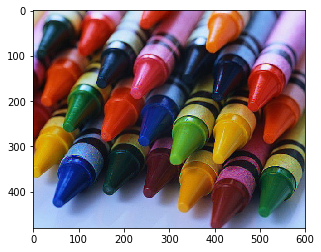

In [40]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
 
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for crayons is: 151.91146419270834
The maximum per-pixel error for crayons is: 53478.125


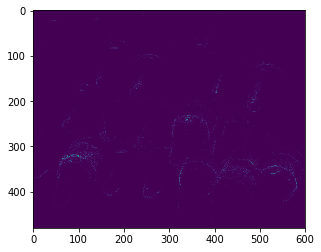

In [32]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

from skimage import io
io.imsave(IMG_DIR+'crayons_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

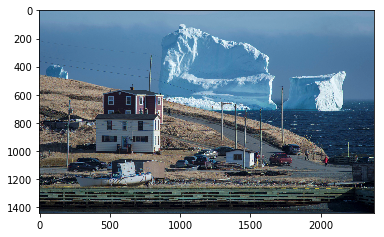

In [41]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for iceberg is: 105.2289647216683
The maximum per-pixel error for iceberg is: 30197.3125


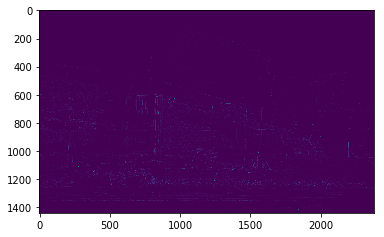

In [34]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))
from skimage import io
io.imsave(IMG_DIR+'iceberg_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

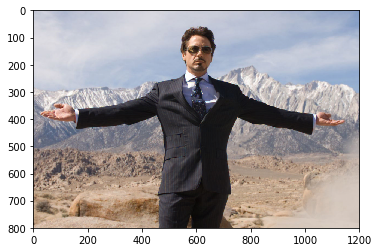

In [42]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for tony is: 23.362575130208334
The maximum per-pixel error for tony is: 9817.8125


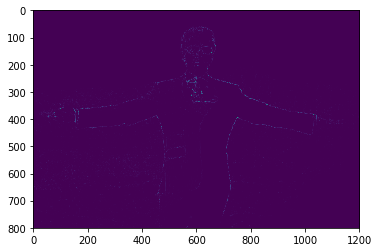

In [36]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))
from skimage import io
io.imsave(IMG_DIR+'tony_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

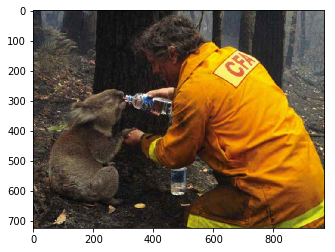

In [43]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
a=get_solution_image(mosaic_img)/255
plt.imshow(a)

from skimage import io
io.imsave(IMG_DIR+'hope_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [44]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    soln_image = get_solution_image(mosaic_img)
    r=soln_image[:,:,0]
    g=soln_image[:,:,1]
    b=soln_image[:,:,2]
    import scipy.signal as signal
    soln_image[:,:,0]=signal.medfilt2d(r-g)+g
    soln_image[:,:,2]=signal.medfilt2d(b-g)+g
    freeman_soln_image=soln_image
    return freeman_soln_image

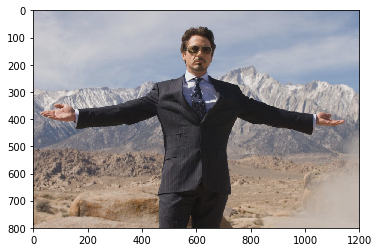

In [48]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for tony is: 15.508873828125
The maximum per-pixel error for tony is: 10873.5


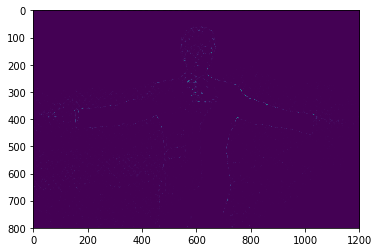

In [49]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))
from skimage import io
io.imsave(IMG_DIR+'tony_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

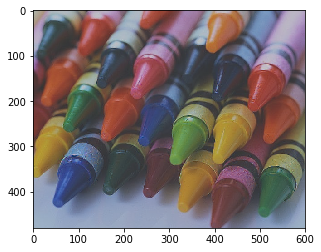

In [50]:
### Feel free to play around with other images for Freeman's method above ###
mosaic_img = read_image('crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for crayons is: 112.34364149305556
The maximum per-pixel error for crayons is: 47857.625


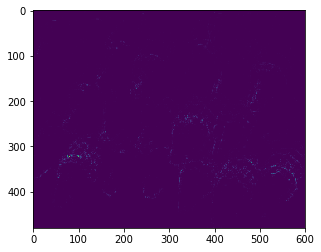

In [51]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

from skimage import io
io.imsave(IMG_DIR+'crayons_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))


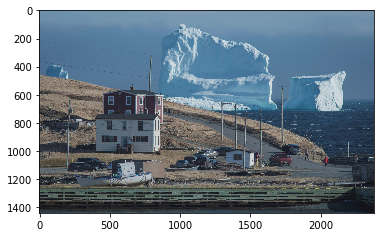

In [52]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE

plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for iceberg is: 67.79525049342872
The maximum per-pixel error for iceberg is: 33720.0625


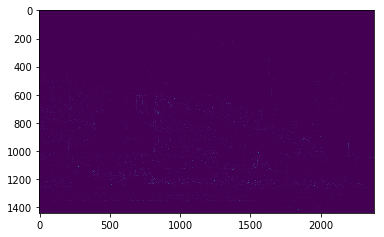

In [53]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

from skimage import io
io.imsave(IMG_DIR+'iceberg_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

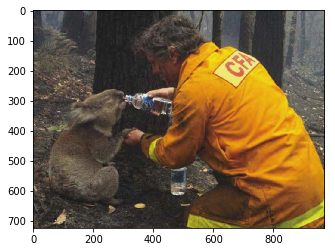

In [54]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))
from skimage import io
io.imsave(IMG_DIR+'hope_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [55]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    imgshape = np.shape(original_image)
    mosaic_img = np.zeros((imgshape[0], imgshape[1]))
    mosaic_img[0::2,0::2]=original_image[0::2,0::2,0]
    mosaic_img[1::2,1::2]=original_image[1::2,1::2,2]
    mosaic_img[0::2,1::2]=original_image[0::2,1::2,1]
    mosaic_img[1::2,0::2]=original_image[1::2,0::2,1]
    return mosaic_img



In [88]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

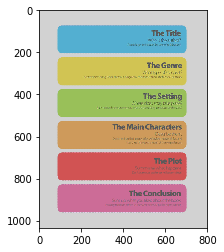

In [57]:
### YOUR CODE HERE ###
# Image 1
original_image = read_image('color.jpg')
mosaic_img=get_mosaic_image(original_image)
fm=np.zeros(np.shape(original_image))
fm[:,:,0]=mosaic_img
fm[:,:,1]=mosaic_img
fm[:,:,2]=mosaic_img
mosaic_img=fm
soln_image = get_freeman_solution_image(mosaic_img)
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))



C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for color is: 346.63540391002414
The maximum per-pixel error for color is: 50068.5625


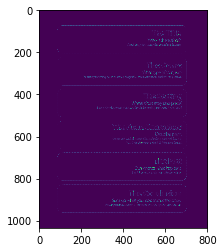

In [58]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for color is: "+str(pp_err))
print("The maximum per-pixel error for color is: "+str(max_err))
from skimage import io
io.imsave(IMG_DIR+'color_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))
io.imsave(IMG_DIR+'color_mosaic_img.bmp',np.uint8((mosaic_img-np.min(mosaic_img))/(np.max(mosaic_img)-np.min(mosaic_img))*255))

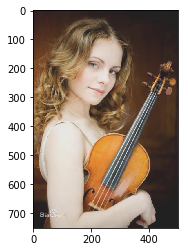

In [59]:
# Image 2
original_image = read_image('Julia_Fischer.jpg')
mosaic_img=get_mosaic_image(original_image)
fm=np.zeros(np.shape(original_image))
fm[:,:,0]=mosaic_img
fm[:,:,1]=mosaic_img
fm[:,:,2]=mosaic_img
mosaic_img=fm
soln_image = get_freeman_solution_image(mosaic_img)
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))



C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The average per-pixel error for Julia_Fischer is: 70.27754716666666
The maximum per-pixel error for Julia_Fischer is: 30474.625


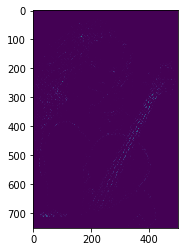

In [60]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for Julia_Fischer is: "+str(pp_err))
print("The maximum per-pixel error for Julia_Fischer is: "+str(max_err))
from skimage import io
io.imsave(IMG_DIR+'Julia_Fischer_freeman_soln_image.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))
io.imsave(IMG_DIR+'Julia_Fischer_mosaic_img.bmp',np.uint8((mosaic_img-np.min(mosaic_img))/(np.max(mosaic_img)-np.min(mosaic_img))*255))

### Bonus Points

Bicubic interpolation:


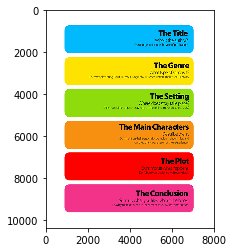

In [62]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####

#Bicubic interpolation
import cv2
import numpy as np

original_image = read_image('color.jpg')
mosaic_img=get_mosaic_image(original_image)
fm=np.zeros(np.shape(original_image))
fm[:,:,0]=mosaic_img
fm[:,:,1]=mosaic_img
fm[:,:,2]=mosaic_img
mosaic_img=fm


print('Bicubic interpolation:')
soln_image = cv2.resize(original_image,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
plt.imshow(np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))


from skimage import io
io.imsave(IMG_DIR+'color_bicubic.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))

soln_image = get_solution_image(mosaic_img)
io.imsave(IMG_DIR+'color_soln.jpg',np.uint8((soln_image-np.min(soln_image))/(np.max(soln_image)-np.min(soln_image))*255))